In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a00412f6feaf59d77a586136690d4627eb60cfb776b1f8258dcdf14def0dae0a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
!pip install -q findspark

In [4]:
#spark
import findspark
findspark.init()

In [5]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('StudentLife').getOrCreate()
df1 = spark.read.csv('/content/drive/MyDrive/Classroom/11. CSE413 Big Data and IoT Lab/Big Data Project/Dataset/student-mat.csv', header = True , inferSchema = True)
df2 = spark.read.csv('/content/drive/MyDrive/Classroom/11. CSE413 Big Data and IoT Lab/Big Data Project/Dataset/student-por.csv', header = True , inferSchema = True)

In [6]:
# Merge the two DataFrames
df = df1.union(df2)

# Show the merged DataFrame
df.show()

math_class_data = df.toPandas()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6|  6|
|    GP|  F| 17|    

In [7]:
from collections import Counter
import pandas as pd
#import rm as rm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
#from pyrsistent import m
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import matplotlib

import sklearn.tree as tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [8]:
math_class_data.shape

(1044, 33)

In [9]:
math_class_data.dtypes

school        object
sex           object
age            int32
address       object
famsize       object
Pstatus       object
Medu           int32
Fedu           int32
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int32
studytime      int32
failures       int32
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int32
freetime       int32
goout          int32
Dalc           int32
Walc           int32
health         int32
absences       int32
G1             int32
G2             int32
G3             int32
dtype: object

In [10]:
math_class_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
math_class_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<ipython-input-12-436afc8fafec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(math_class_data['Fedu'],


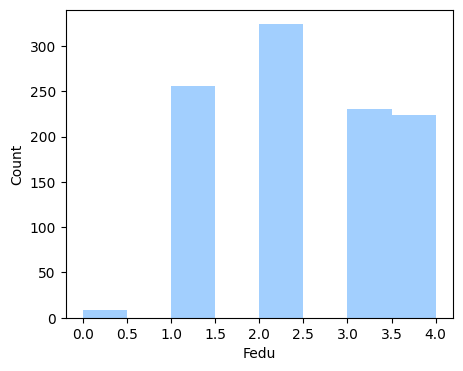

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Fedu'],
             hist_kws={"alpha": 1, "color": "#a2cffe"},
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Fedu")

<ipython-input-13-e62e353ab7ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(math_class_data['Medu'],


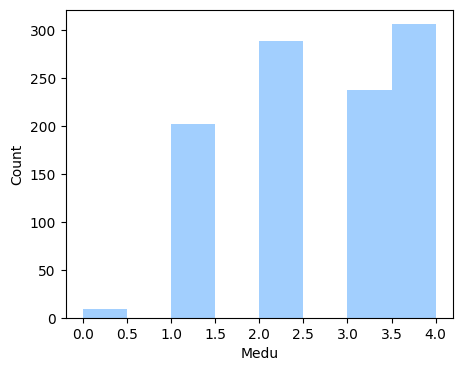

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Medu'],
             hist_kws={"alpha": 1, "color": "#a2cffe"},
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Medu")

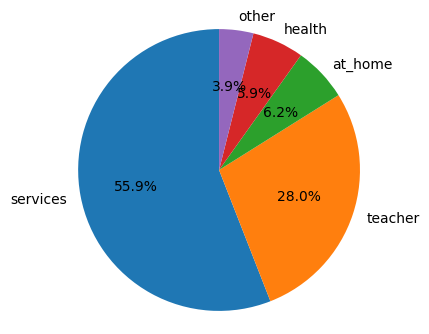

In [14]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['Fjob'].value_counts().tolist(),
        labels=['services','teacher', 'at_home', 'health','other'],
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

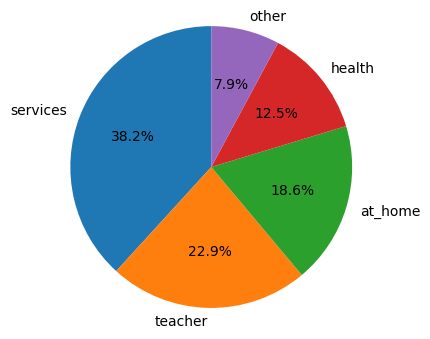

In [15]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['Mjob'].value_counts().tolist(),
        labels=['services','teacher', 'at_home', 'health','other'],
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

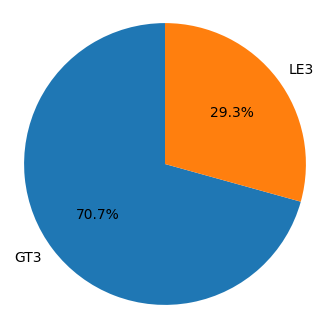

In [16]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['famsize'].value_counts().tolist(),
        labels=['GT3','LE3'],
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

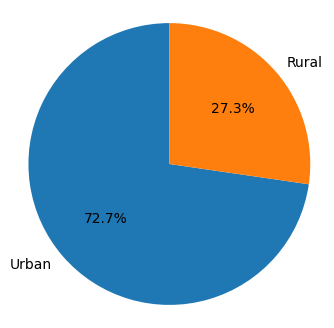

In [17]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['address'].value_counts().tolist(),
        labels=['Urban','Rural'],
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

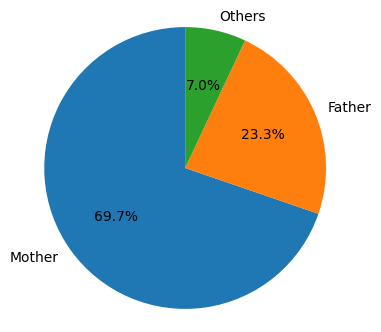

In [18]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['guardian'].value_counts().tolist(),
        labels=['Mother','Father','Others'],
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

<ipython-input-19-003692b44695>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(math_class_data['studytime'],


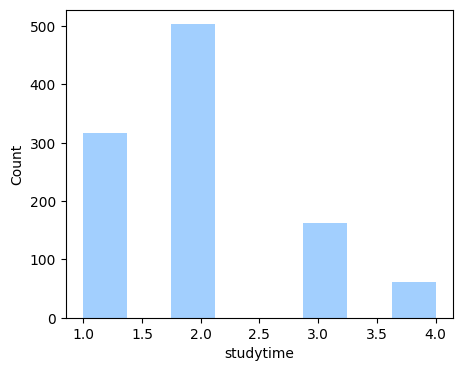

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['studytime'],
             hist_kws={"alpha": 1, "color": "#a2cffe"},
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="studytime")

<ipython-input-20-c8682c567066>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(math_class_data['Dalc'],


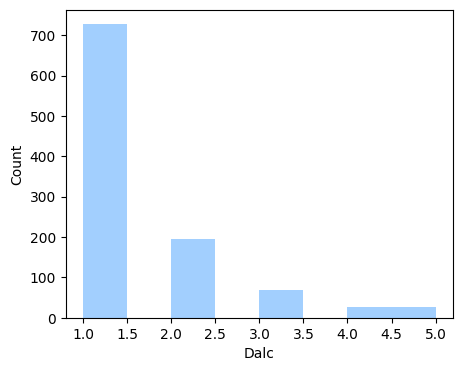

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Dalc'],
             hist_kws={"alpha": 1, "color": "#a2cffe"},
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Dalc")

<ipython-input-21-b7ebec10f556>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(math_class_data['Walc'],


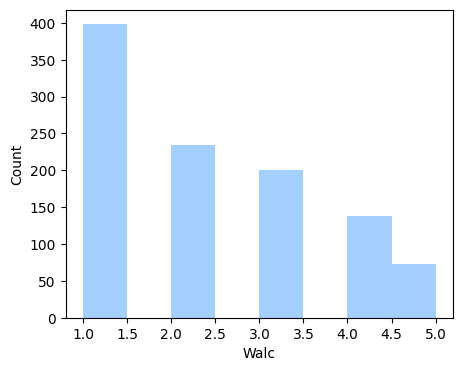

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Walc'],
             hist_kws={"alpha": 1, "color": "#a2cffe"},
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Walc")

<Axes: xlabel='Fjob', ylabel='G3'>

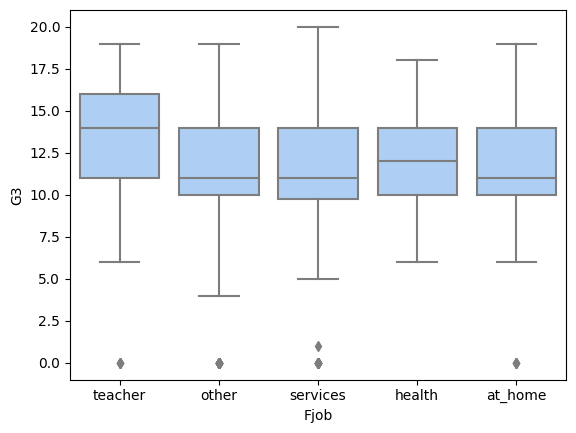

In [22]:
sns.boxplot(x='Fjob',y='G3', data=math_class_data, color='#a2cffe')

<Axes: xlabel='romantic', ylabel='G3'>

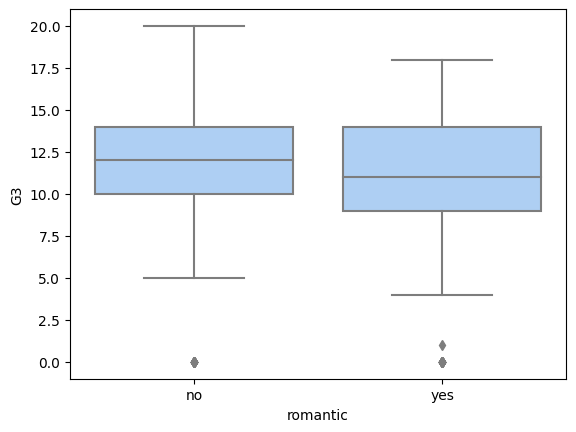

In [23]:
sns.boxplot(x='romantic',y='G3', data=math_class_data, color='#a2cffe')

<Axes: xlabel='sex', ylabel='G3'>

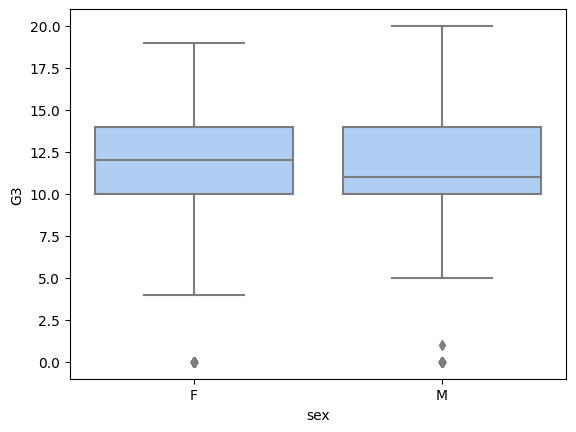

In [24]:
sns.boxplot(x='sex',y='G3', data=math_class_data, color='#a2cffe')

<Axes: xlabel='address', ylabel='G3'>

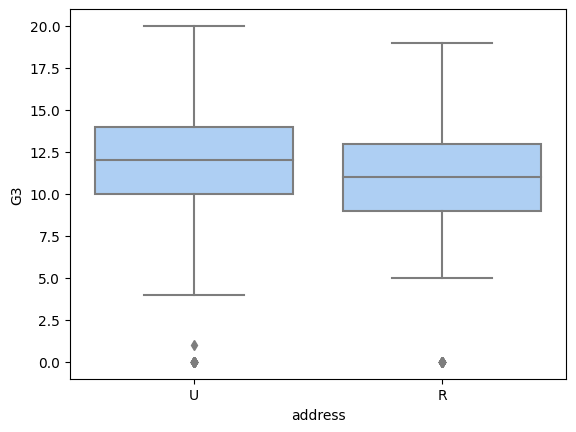

In [25]:
sns.boxplot(x='address',y='G3', data=math_class_data, color='#a2cffe')


<Axes: xlabel='schoolsup', ylabel='G3'>

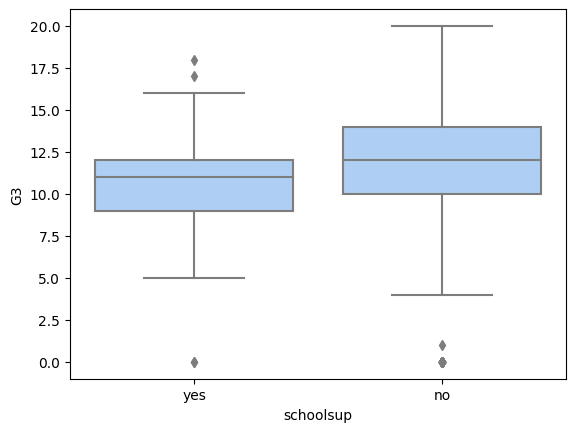

In [26]:
sns.boxplot(x='schoolsup',y='G3', data=math_class_data, color='#a2cffe')

<Axes: xlabel='famsup', ylabel='G3'>

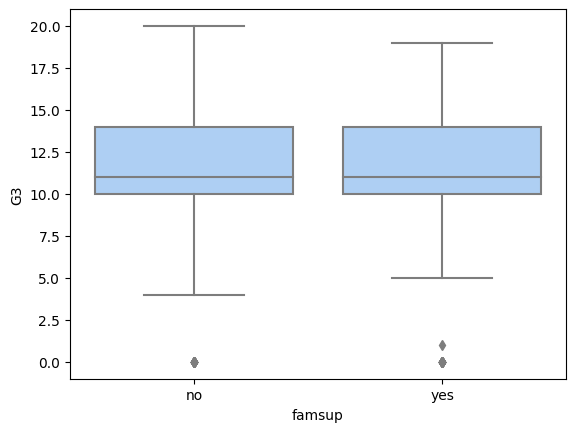

In [27]:
sns.boxplot(x='famsup',y='G3', data=math_class_data, color='#a2cffe')

<Axes: xlabel='higher', ylabel='G3'>

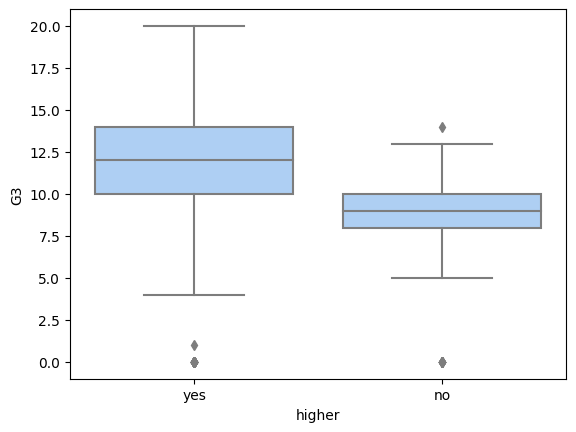

In [28]:
sns.boxplot(x='higher',y='G3', data=math_class_data, color='#a2cffe')

<ipython-input-29-eeaf367c5c4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(math_class_data.corr(),annot = True,fmt = ".2f",cbar = True,cmap = "YlGnBu")


<Axes: >

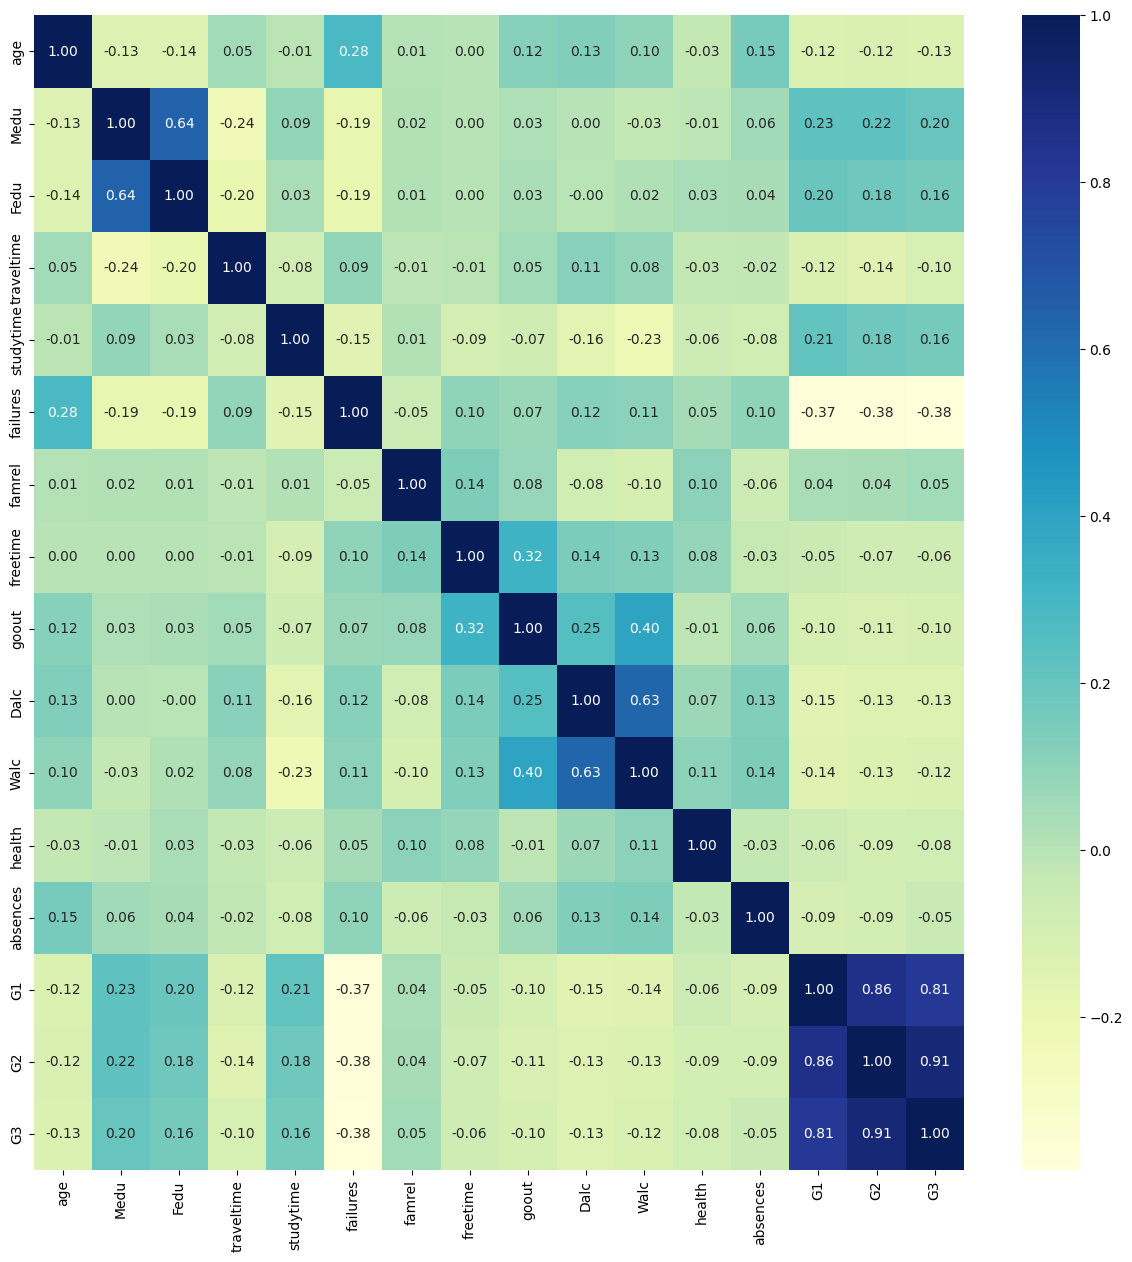

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(math_class_data.corr(),annot = True,fmt = ".2f",cbar = True,cmap = "YlGnBu")

In [30]:
math_class_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [31]:
math_class_data['final_grade'] = 'na'
math_class_data.loc[(math_class_data.G3 >= 10) & (math_class_data.G3 <= 20), 'final_grade'] = 'high'
math_class_data.loc[(math_class_data.G3 >= 0) & (math_class_data.G3 <= 10), 'final_grade'] = 'low'
math_class_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,high
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,low


In [32]:
math_class_data.drop(['G3'] , axis=1 , inplace=True)

In [33]:
cleanup_nums = {
    "school":{"GP": 0, "MS": 1},
    "sex":{"F": 0, "M": 1},
    "address":{"U": 0, "R": 1},
    "famsize":{"LE3": 0, "GT3": 1},
    "Pstatus":{"T": 0, "A": 1},
    "Mjob":{"teacher": 0, "health": 1,"services": 2,"at_home": 3,"other": 4},
    "Fjob":{"teacher": 0, "health": 1,"services": 2,"at_home": 3,"other": 4},
    "reason":{"home": 0, "reputation": 1,"course":2,"other":3},
    "guardian":{"mother": 0, "father": 1,"other":2},
    "schoolsup":{"yes": 0, "no": 1},
    "famsup":{"yes": 0, "no": 1},
    "paid":{"yes": 0, "no": 1},
    "activities":{"yes": 0, "no": 1},
    "nursery":{"yes": 0, "no": 1},
    "higher":{"yes": 0, "no": 1},
    "internet":{"yes": 0, "no": 1},
    "romantic": {"yes": 0, "no": 1},
    "final_grade":{"high":0, "low":1}}

In [34]:
math_class_data.replace(cleanup_nums, inplace=True)
math_class_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,final_grade
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,1
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,1
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,0
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,1


In [35]:
math_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       1044 non-null   int64
 1   sex          1044 non-null   int64
 2   age          1044 non-null   int32
 3   address      1044 non-null   int64
 4   famsize      1044 non-null   int64
 5   Pstatus      1044 non-null   int64
 6   Medu         1044 non-null   int32
 7   Fedu         1044 non-null   int32
 8   Mjob         1044 non-null   int64
 9   Fjob         1044 non-null   int64
 10  reason       1044 non-null   int64
 11  guardian     1044 non-null   int64
 12  traveltime   1044 non-null   int32
 13  studytime    1044 non-null   int32
 14  failures     1044 non-null   int32
 15  schoolsup    1044 non-null   int64
 16  famsup       1044 non-null   int64
 17  paid         1044 non-null   int64
 18  activities   1044 non-null   int64
 19  nursery      1044 non-null   int64
 20  higher  

In [36]:
math_class_data = spark.createDataFrame(math_class_data)

In [37]:
math_class_data.printSchema()

root
 |-- school: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- age: long (nullable = true)
 |-- address: long (nullable = true)
 |-- famsize: long (nullable = true)
 |-- Pstatus: long (nullable = true)
 |-- Medu: long (nullable = true)
 |-- Fedu: long (nullable = true)
 |-- Mjob: long (nullable = true)
 |-- Fjob: long (nullable = true)
 |-- reason: long (nullable = true)
 |-- guardian: long (nullable = true)
 |-- traveltime: long (nullable = true)
 |-- studytime: long (nullable = true)
 |-- failures: long (nullable = true)
 |-- schoolsup: long (nullable = true)
 |-- famsup: long (nullable = true)
 |-- paid: long (nullable = true)
 |-- activities: long (nullable = true)
 |-- nursery: long (nullable = true)
 |-- higher: long (nullable = true)
 |-- internet: long (nullable = true)
 |-- romantic: long (nullable = true)
 |-- famrel: long (nullable = true)
 |-- freetime: long (nullable = true)
 |-- goout: long (nullable = true)
 |-- Dalc: long (nullable = true)
 |-- Walc: lon

In [38]:
math_class_data.head()

Row(school=0, sex=0, age=18, address=0, famsize=1, Pstatus=1, Medu=4, Fedu=4, Mjob=3, Fjob=0, reason=2, guardian=0, traveltime=2, studytime=2, failures=0, schoolsup=0, famsup=1, paid=1, activities=1, nursery=0, higher=0, internet=1, romantic=1, famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, final_grade=1)

In [98]:
math_class_data.show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+-----------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2|final_grade|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+-----------+
|     0|  0| 18|      0|      1|      1|   4|   4|   3|   0|     2|       0|         2|        2|       0|        0|     1|   1|         1|      0|     0|       1|       1|     4|       3|    4|   1|   1|     3|       6|  5|  6|          1|
|     0|  0| 17|      0|      1|    

In [39]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [40]:
math_class_data.columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'final_grade']

In [41]:
math_class_data.show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+-----------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2|final_grade|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+-----------+
|     0|  0| 18|      0|      1|      1|   4|   4|   3|   0|     2|       0|         2|        2|       0|        0|     1|   1|         1|      0|     0|       1|       1|     4|       3|    4|   1|   1|     3|       6|  5|  6|          1|
|     0|  0| 17|      0|      1|    

In [42]:
assembler = VectorAssembler(
  inputCols=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian',
             'traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher',
             'internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2'],
    outputCol="features")

In [43]:
output = assembler.transform(math_class_data)

In [44]:
from pyspark.ml.feature import StringIndexer

In [45]:
indexer = StringIndexer(inputCol="final_grade", outputCol="final_gradeIndex")
output_fixed = indexer.fit(output).transform(output)

In [46]:
output_fixed.select("final_grade", "final_gradeIndex").show()


+-----------+----------------+
|final_grade|final_gradeIndex|
+-----------+----------------+
|          1|             1.0|
|          1|             1.0|
|          1|             1.0|
|          0|             0.0|
|          1|             1.0|
|          0|             0.0|
|          0|             0.0|
|          1|             1.0|
|          0|             0.0|
|          0|             0.0|
|          1|             1.0|
|          0|             0.0|
|          0|             0.0|
|          0|             0.0|
|          0|             0.0|
|          0|             0.0|
|          0|             0.0|
|          1|             1.0|
|          1|             1.0|
|          1|             1.0|
+-----------+----------------+
only showing top 20 rows



In [47]:
final_data = output_fixed.select("features",'final_gradeIndex')

+--------------------+----------------+
|            features|final_gradeIndex|
+--------------------+----------------+
|[0.0,0.0,18.0,0.0...|             1.0|
|[0.0,0.0,17.0,0.0...|             1.0|
|[0.0,0.0,15.0,0.0...|             1.0|
|(32,[2,4,6,7,8,9,...|             0.0|
|[0.0,0.0,16.0,0.0...|             1.0|
|(32,[1,2,6,7,8,9,...|             0.0|
|[0.0,1.0,16.0,0.0...|             0.0|
|[0.0,0.0,17.0,0.0...|             1.0|
|(32,[1,2,5,6,7,8,...|             0.0|
|(32,[1,2,4,6,7,8,...|             0.0|
|(32,[2,4,6,7,9,10...|             1.0|
|[0.0,0.0,15.0,0.0...|             0.0|
|[0.0,1.0,15.0,0.0...|             0.0|
|[0.0,1.0,15.0,0.0...|             0.0|
|[0.0,1.0,15.0,0.0...|             0.0|
|[0.0,0.0,16.0,0.0...|             0.0|
|(32,[2,4,6,7,8,9,...|             0.0|
|[0.0,0.0,16.0,0.0...|             1.0|
|[0.0,1.0,17.0,0.0...|             1.0|
|[0.0,1.0,16.0,0.0...|             1.0|
+--------------------+----------------+
only showing top 20 rows



In [48]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [49]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [50]:
dtc = DecisionTreeClassifier(labelCol='final_gradeIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='final_gradeIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='final_gradeIndex',featuresCol='features')

In [51]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [52]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [53]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [54]:
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'final_gradeIndex')

In [55]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

DTC
0.9335502958579882


In [56]:
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.9618934911242605


In [75]:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='final_gradeIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

GBT
0.8846153846153846


In [81]:
from pyspark.ml import PipelineModel

In [79]:
# Save Decision Tree model
dtc_model.save("/content/drive/MyDrive/Classroom/11. CSE413 Big Data and IoT Lab/Big Data Project/Model/dtc_model")

# Save Random Forest model
rfc_model.save("/content/drive/MyDrive/Classroom/11. CSE413 Big Data and IoT Lab/Big Data Project/Model/rfc_model")

# Save GBT model
gbt_model.save("/content/drive/MyDrive/Classroom/11. CSE413 Big Data and IoT Lab/Big Data Project/Model/gbt_model")

### pd *conver*